In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex,Title,Q,S
0,0,1,0.0,3,22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,1,2,1.0,1,38.0,1,0,PC 17599,71.2833,0,2,0,0
2,2,3,1.0,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,3,4,1.0,1,35.0,1,0,113803,53.1000,0,2,0,1
4,4,5,0.0,3,35.0,0,0,373450,8.0500,1,0,0,1


In [3]:
df.Survived.value_counts() #sınıf dengesizliği yoktur.

0.0    549
1.0    342
Name: Survived, dtype: int64

In [4]:
X = df.drop(["Survived","Ticket"],axis=1)
y = df["Survived"]

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=150,stratify=y)
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train,y_train)

predict_train = log_reg.predict(X_train)
predict_test = log_reg.predict(X_test)
print("model doğruluğu: ",log_reg.score(X_test,y_test))

model doğruluğu:  0.8156424581005587


In [95]:
# confusion_matrix

cross_table_train = pd.crosstab(y_train, predict_train, rownames=['Actual'], colnames=['Predicted'], margins=True)
cross_table_test = pd.crosstab(y_test, predict_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

display("eğitim veri kümesi confusion matrix",cross_table_train)
display("**"*20)
display("test veri kümesi confusion matrix",cross_table_test)


'eğitim veri kümesi confusion matrix'

Predicted,0.0,1.0,All
Actual,,,
0.0,381,58,439
1.0,68,205,273
All,449,263,712


'****************************************'

'test veri kümesi confusion matrix'

Predicted,0.0,1.0,All
Actual,,,
0.0,98,12,110
1.0,21,48,69
All,119,60,179


In [96]:
#metrikler

from sklearn.metrics import classification_report

train_metrics = classification_report(y_train,predict_train)
test_metrics = classification_report(y_test,predict_test)

print("eğitim veri kümesi metrikleri ", train_metrics ,sep = "\n")
print("--"*30)
print("test veri kümesi metrikleri ", test_metrics ,sep = "\n")


eğitim veri kümesi metrikleri 
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       439
         1.0       0.78      0.75      0.76       273

    accuracy                           0.82       712
   macro avg       0.81      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712

------------------------------------------------------------
test veri kümesi metrikleri 
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       110
         1.0       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

print("Veri kümesindeki satır sayısı:",len(y))
print("Eğitim veri kümesindeki satur sayısı:",len(y_train))
print("Test veri kümesindeki satır sayısı:",len(y_test))

Veri kümesindeki satır sayısı: 891
Eğitim veri kümesindeki satur sayısı: 712
Test veri kümesindeki satır sayısı: 179


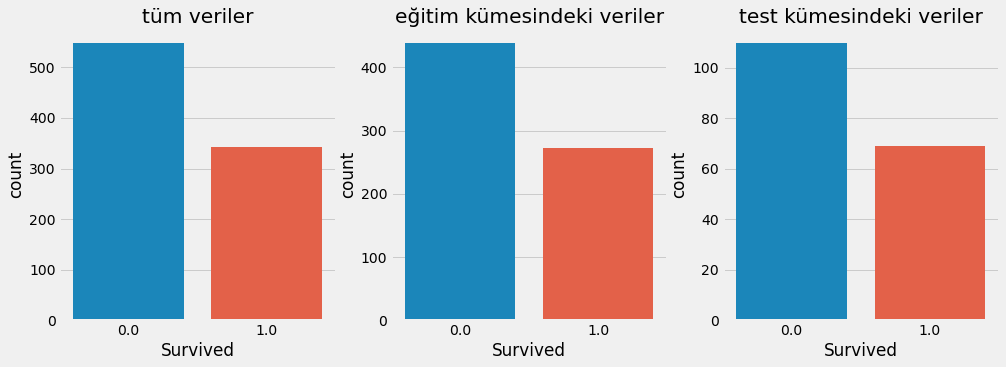

Tüm veri seti için hayatta kalanların (y=1) oranı: 38.38383838383838
Eğitim veri seti için hayatta kalanların (y_train=1) oranı: 38.342696629213485
Test veri seti için hayatta kalanların (y_test=1) oranı: 38.547486033519554


In [98]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("tüm veriler")
plt.subplot(132)
sns.countplot(y_train)
plt.title("eğitim kümesindeki veriler")
plt.subplot(133)
sns.countplot(y_test)
plt.title("test kümesindeki veriler")
plt.show()

print("Tüm veri seti için hayatta kalanların (y=1) oranı:", len(y[y==1])/len(y)*100)
print("Eğitim veri seti için hayatta kalanların (y_train=1) oranı:", len(y_train[y_train==1])/len(y_train)*100)
print("Test veri seti için hayatta kalanların (y_test=1) oranı:", len(y_test[y_test==1])/len(y_test)*100)


Tüm veri setleri için de hayatta kalanların oranı birbirine oldukça yakın.Ancak X değerlerinin nasıl dağıldığını bilmiyoruz. İşte bunun için çapraz doğrulamaya ihtiyaç duyacağız.

### cross_val_score ve cross_validate ile çapraz doğrulama


In [99]:
from sklearn.model_selection import cross_validate,cross_val_score

cv = cross_validate(estimator=log_reg,
                   X=X,
                   y=y,
                    return_train_score=True,
                   cv=10)

print("eğitim kümesi skorları:",cv["train_score"], sep="\n")
print("-"*50)
print("test kümesi skorları:", cv["test_score"], sep="\n")

eğitim kümesi skorları:
[0.82521848 0.81795511 0.82543641 0.81795511 0.82418953 0.82294264
 0.81670823 0.819202   0.81546135 0.82169576]
--------------------------------------------------
test kümesi skorları:
[0.82222222 0.84269663 0.76404494 0.86516854 0.80898876 0.76404494
 0.80898876 0.82022472 0.84269663 0.82022472]


In [100]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Eğitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  0.8159300873907614
Eğitim Kümesi Ortalaması :  0.8206764611567212


In [101]:
cv = cross_validate(estimator=log_reg, 
                     X=X,
                     y=y,
                     cv=10,
                    return_train_score=True,

                     scoring = ['accuracy', 'precision', 'r2']
                    )


In [104]:
print('Test Kümesi Doğruluk Ortalaması     : {:.3f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.3f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.3f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.3f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 0.816
Test Kümesi Hassasiyet Ortalaması   : 0.776
Eğitim Kümesi Doğruluk Ortalaması   : 0.821
Eğitim Kümesi Hassasiyet Ortalaması : 0.781


In [105]:
from sklearn.model_selection import cross_val_predict
y_tahmin = cross_val_predict(estimator=log_reg, X=X, y=y, cv=10)
print(y_tahmin[0:10])

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


#### Hiperparametre ayarlama

In [106]:
parametreler = {"C":[10**x for x in range(-5,5,1)],
               "penalty":['l1','l2']}

#### GridSearchCV ile Hiperparametre Ayarı

In [107]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                      param_grid=parametreler,
                      cv=10)

grid_cv.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [108]:
print("en iyi parametreler:", grid_cv.best_params_)
print("en iyi skor: ", grid_cv.best_score_)

en iyi parametreler: {'C': 1, 'penalty': 'l1'}
en iyi skor:  0.8181772784019975


In [109]:
import pandas as pd          
sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002795,0.001074,0.001796,0.000600,0.00001,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.611111,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.606742,0.616167,0.003750,19
1,0.001300,0.001346,0.000595,0.000792,0.00001,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.533333,0.573034,0.674157,0.730337,0.651685,0.640449,0.640449,0.674157,0.696629,0.629213,0.644345,0.054432,17
2,0.003439,0.006169,0.001580,0.004741,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.611111,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.617978,0.606742,0.616167,0.003750,19
3,0.004683,0.007154,0.000000,0.000000,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.588889,0.606742,0.674157,0.741573,0.674157,0.640449,0.674157,0.707865,0.707865,0.606742,0.662260,0.047852,16
4,0.009373,0.007653,0.004686,0.007158,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.500000,0.573034,0.662921,0.741573,0.651685,0.651685,0.629213,0.674157,0.685393,0.629213,0.639888,0.062177,18


In [110]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head()

,param_penalty,param_C,mean_test_score
10,l1,1,0.818177
11,l2,1,0.815930
13,l2,10,0.814806
12,l1,10,0.814806
19,l2,10000,0.813695


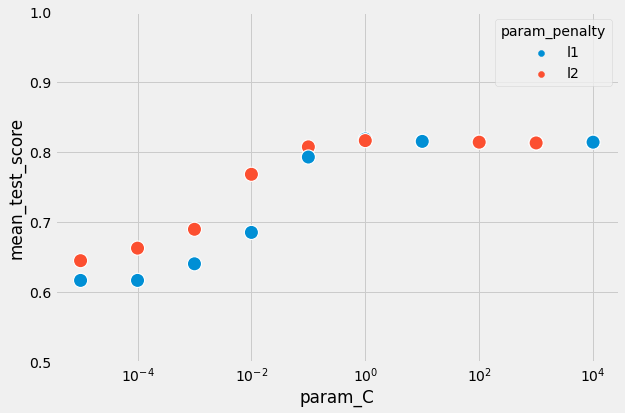

In [111]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:20], s=200)
plt.xscale('log')
plt.ylim((0.5,1))
plt.show()

#### RandomizedSearchCV ile Hiperparametre Ayarı

In [112]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [113]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [114]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi skor   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l1', 'C': 1000}
Tüm hassasiyet değerleri   :  [0.65634031 0.73705362 0.77522766 0.7755645  0.77547354 0.77204612
 0.70738589 0.70749429 0.77613492 0.        ]
En iyi skor   :  0.7761349154313926


In [115]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)

In [116]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs.head()

,param_penalty,param_C,mean_test_score
8,l1,1000,0.776135
3,l2,1,0.775565
4,l1,100,0.775474
2,l2,10,0.775228
5,l2,1000,0.772046


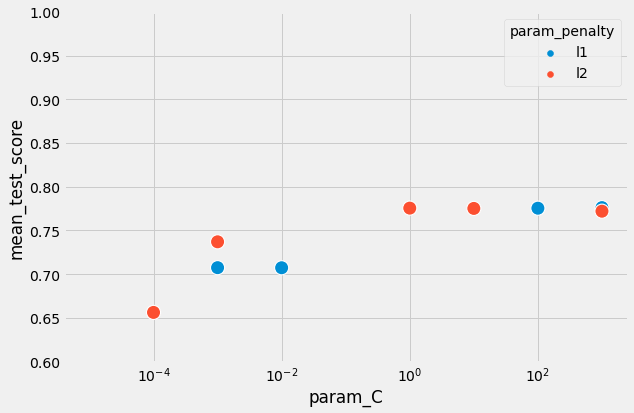

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('log')
plt.ylim((0.6,1))
plt.show()

Sonuc: Hiperparametre ayarlaması ile en uygun hiperparametreleri elde ettik.Buna göre en uygun hiperparametre değerleri GridSearchCV yöntemiyle elde ettiğimiz {'C': 1, 'penalty': 'l1'} parametreleri olup en iyi skor:  0.818'dir.